# Neural Modeling Methods & Tools
## wines dataset
 



### Reading the winequality-red dataset.

In [ ]:
import pandas as pd
import numpy as np
wines = pd.read_csv('data/winequality-red.csv',header=None)
wines.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
9,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [ ]:
len(wines)

1600

In [ ]:
labels = wines.loc[:,11].values
labels[0:100]

array(['quality', '5', '5', '5', '6', '5', '5', '5', '7', '7', '5', '5',
       '5', '5', '5', '5', '5', '7', '5', '4', '6', '6', '5', '5', '5',
       '6', '5', '5', '5', '5', '6', '5', '6', '5', '6', '5', '6', '6',
       '7', '4', '5', '5', '4', '6', '5', '5', '4', '5', '5', '5', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '5', '6', '5', '5', '7',
       '5', '5', '5', '5', '5', '5', '6', '6', '5', '5', '4', '5', '5',
       '5', '6', '5', '4', '5', '5', '5', '5', '6', '5', '6', '5', '5',
       '5', '5', '6', '5', '5', '4', '6', '5', '5', '5'], dtype=object)

In [ ]:
set(labels)

{'3', '4', '5', '6', '7', '8', 'quality'}

In [ ]:
labels = wines.loc[1:, 11].values.astype(float)
labels[0:]

array([5., 5., 5., ..., 6., 5., 6.])

In [ ]:
labels2 = map(lambda x: x - 3, labels)
labels2 = list(labels2)
set(labels2)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [ ]:
train = wines.loc[1:,:10].values.astype(float)
np.shape(train)

(1599, 11)

###### Building Neural Network using conx

In [ ]:
import conx as cx

wine = cx.Network("Wine Network")
wine.add(cx.Layer("input", 11))
wine.add(cx.Layer("hidden", 64, activation="relu"))
wine.add(cx.Layer("output", 6, activation="sigmoid"))
wine.connect()
wine.compile(error="mse", optimizer="adam")
wine.summary()

ConX, version 3.7.10


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 11)]              0         
                                                                 
 hidden (Dense)              (None, 64)                768       
                                                                 
 output (Dense)              (None, 6)                 390       
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


###### Visualizing the neural network

1/1 [==============================] - 0s 29ms/step



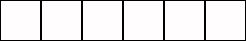

In [ ]:
wine.picture()

In [ ]:
wine.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

1/1 [==============================] - 0s 44ms/step


[1.0, 0.9993964433670044, 0.9999988675117493, 1.0, 1.0, 0.9999542236328125]

In [ ]:
for item in train[:10]:
    for pattern in [item]:
        print(pattern, wine.propagate(input=pattern), '\n')

1/1 [==============================] - 0s 17ms/step
[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [0.9995412230491638, 0.9935763478279114, 0.9983341097831726, 0.9997735619544983, 0.9996614456176758, 0.8705431222915649] 

1/1 [==============================] - 0s 18ms/step
[ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
  0.68    9.8   ] [1.0, 0.9997187256813049, 0.9999932646751404, 0.999998152256012, 0.9999988675117493, 0.9917553663253784] 

1/1 [==============================] - 0s 17ms/step
[7.80e+00 7.60e-01 4.00e-02 2.30e+00 9.20e-02 1.50e+01 5.40e+01 9.97e-01
 3.26e+00 6.50e-01 9.80e+00] [0.9999996423721313, 0.9997487664222717, 0.999928891658783, 0.9999445676803589, 0.9999786615371704, 0.9258542656898499] 

1/1 [==============================] - 0s 22ms/step
[11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16   0.58
  9.8  ] [0.9999999403953552, 0.9998401999473572, 0.9999749660491943, 0.9999529719352722, 0

##### One-hot encode categorical features

In [ ]:

labels3 = pd.get_dummies(labels2)
view = labels3.head(20)
view['val'] = labels2[:20]
view

C:\Users\cyrus\anaconda3\envs\conx2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0.0,1.0,2.0,3.0,4.0,5.0,val
0,0,0,1,0,0,0,2.0
1,0,0,1,0,0,0,2.0
2,0,0,1,0,0,0,2.0
3,0,0,0,1,0,0,3.0
4,0,0,1,0,0,0,2.0
5,0,0,1,0,0,0,2.0
6,0,0,1,0,0,0,2.0
7,0,0,0,0,1,0,4.0
8,0,0,0,0,1,0,4.0
9,0,0,1,0,0,0,2.0


In [ ]:
labels3.values

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
train[:10]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.400e+00, 6.600e-01, 0.000e+00, 1.800e+00, 7.500e-02, 1.300e+01,
        4.000e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.900e+00, 6.000e-01, 6.000e-02, 1.600e+00, 6.900e-02, 1.500e+01,
        5.900e+01, 9.964e-01, 3.300e+00, 4.600e-01, 9.400e+00],
       [7.300e+00, 6.500e-01, 0.00

In [ ]:
list((labels3.values)[0])

[0, 0, 1, 0, 0, 0]

In [ ]:
list(zip(train, labels3.values))
patterns = []

for i in range(0, len(train)):
    #inputs = list(np.vectorize(int)(train[i]))
    inputs = list(train[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
patterns[0:2]

[([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
  [0, 0, 1, 0, 0, 0]),
 ([7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8],
  [0, 0, 1, 0, 0, 0])]

In [ ]:
#wine.setInputs(train)
#wine.setOutputs(labels2)
wine.dataset.load(patterns)

1/1 [==============================] - 0s 16ms/step


#####Training the Neural Network

In [ ]:
wine.reset()
wine.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Evaluating initial training metrics...
Training...
       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#    0 |   0.66878 |   0.00000 
#  100 |   0.08942 |   0.06250 


C:\Users\cyrus\anaconda3\envs\conx2\lib\site-packages\conx\network.py:2606: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.pause(0.01)


#  200 |   0.08933 |   0.07815 
#  300 |   0.08618 |   0.06067 
#  400 |   0.08672 |   0.07008 
#  500 |   0.08495 |   0.07133 
#  600 |   0.08417 |   0.08065 
#  700 |   0.08310 |   0.07750 
#  800 |   0.08230 |   0.08756 
#  900 |   0.08102 |   0.08379 
# 1000 |   0.08062 |   0.08256 
# 1100 |   0.07946 |   0.09940 
# 1200 |   0.07946 |   0.10002 
# 1300 |   0.07691 |   0.11377 
# 1400 |   0.07627 |   0.09885 
# 1500 |   0.07661 |   0.11129 
# 1600 |   0.07554 |   0.12700 
# 1700 |   0.07405 |   0.12815 
# 1800 |   0.07469 |   0.12698 
# 1900 |   0.07411 |   0.13321 
# 2000 |   0.07461 |   0.13946 
# 2100 |   0.07324 |   0.13331 
# 2200 |   0.07159 |   0.13002 
# 2300 |   0.07200 |   0.12637 
# 2400 |   0.07214 |   0.15258 
# 2500 |   0.07227 |   0.18071 
# 2600 |   0.07005 |   0.15758 
# 2700 |   0.07055 |   0.16573 
# 2800 |   0.06999 |   0.16889 
# 2900 |   0.06890 |   0.17069 
# 3000 |   0.07030 |   0.17823 
# 3100 |   0.06852 |   0.18762 
# 3200 |   0.06883 |   0.19010 
# 3300 |

Evaluating initial training metrics...
Training...
       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#    0 |   0.56759 |   0.00000 
# 1000 |   0.07623 |   0.11192 


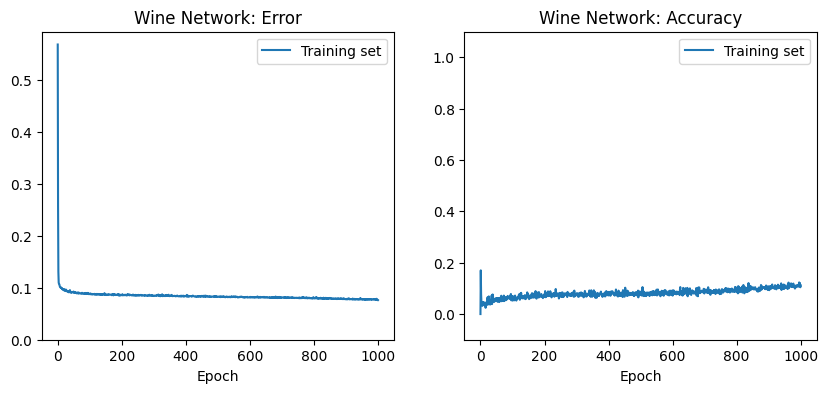

# 1000 |   0.07623 |   0.11192 


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('pyqt5')
matplotlib.use('Qt5Agg')
%matplotlib inline

wine.reset()
wine.train(epochs=1000, accuracy=.75, tolerance=.2, report_rate=1000, plot=True)

#plt.savefig("mygraph.png")

##### Constructing a new neural network


In [ ]:
wine2 = cx.Network("Wine Network Number 2")
wine2.add(cx.Layer("input", 11))

wine2.add(cx.Layer("hidden1", 64, activation="relu"))
wine2.add(cx.Layer("hidden2", 32, activation="tanh"))
wine2.add(cx.Layer("output", 6, activation="sigmoid"))
wine2.connect()
wine2.compile(error="mse", optimizer="adam")
wine2.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 11)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                768       
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 3,046
Trainable params: 3,046
Non-trainable params: 0
_________________________________________________________________


##### Visualizing the neural network

1/1 [==============================] - 0s 31ms/step



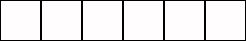

In [ ]:
wine2.picture()

In [ ]:
wine2.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

1/1 [==============================] - 0s 47ms/step


[0.8238439559936523,
 0.7007471919059753,
 0.8661033511161804,
 0.5162646770477295,
 0.20339763164520264,
 0.5026423335075378]

In [ ]:
wine2.dataset.load(patterns)

1/1 [==============================] - 0s 16ms/step


##### Training the neural network for 75% accuracy


Evaluating initial training metrics...
Training...
       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#    0 |   0.32477 |   0.00000 
#  100 |   0.08431 |   0.06129 


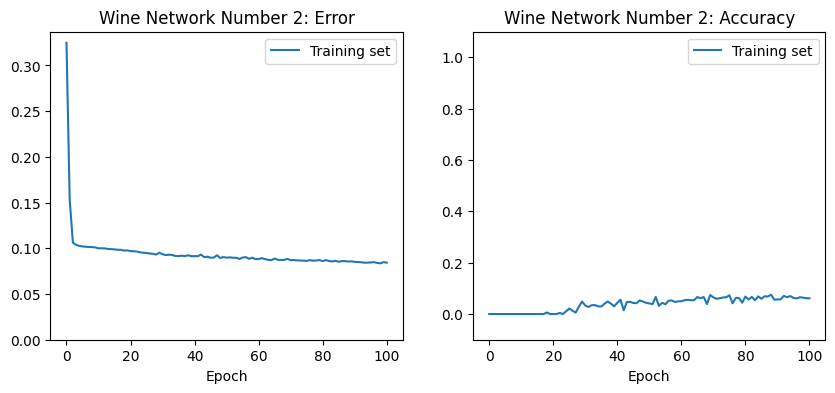

#  200 |   0.07707 |   0.08696 
#  300 |   0.07240 |   0.14875 
#  400 |   0.06910 |   0.20331 
#  500 |   0.06380 |   0.25450 
#  600 |   0.05973 |   0.27704 
#  700 |   0.05651 |   0.33585 
#  800 |   0.05456 |   0.35452 
#  900 |   0.05209 |   0.38780 
# 1000 |   0.04989 |   0.42290 
# 1100 |   0.04927 |   0.43913 
# 1200 |   0.04769 |   0.45657 
# 1300 |   0.04564 |   0.47786 
# 1400 |   0.04202 |   0.51038 
# 1500 |   0.04141 |   0.54526 
# 1600 |   0.03998 |   0.55532 
# 1700 |   0.04141 |   0.54843 
# 1800 |   0.03792 |   0.58665 
# 1900 |   0.03802 |   0.58599 
# 2000 |   0.03594 |   0.61044 
# 2100 |   0.03787 |   0.59851 
# 2200 |   0.03532 |   0.61788 
# 2300 |   0.03397 |   0.64470 
# 2400 |   0.03357 |   0.65050 
# 2500 |   0.03439 |   0.64663 
# 2600 |   0.03354 |   0.66163 
# 2700 |   0.03352 |   0.65349 
# 2800 |   0.03384 |   0.65232 
# 2900 |   0.03413 |   0.66042 
# 3000 |   0.03139 |   0.68042 
# 3100 |   0.03232 |   0.67919 
# 3200 |   0.03134 |   0.69544 
# 3300 |

In [ ]:
wine2.reset()
wine2.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Implemented wines dataset using tenserflow and keras

In [ ]:
pip install -U scikit-learn


     ---------------------------------------- 7.1/7.1 MB 8.7 MB/s eta 0:00:00
     --------------------------------------- 34.1/34.1 MB 21.8 MB/s eta 0:00:00
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

wines = pd.read_csv('C:/Users/cyrus/Desktop/neural modeling/W7L2/data/winequality-red.csv',header=None)
wines


,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [ ]:
labels = wines.loc[:,11].values
labels[0:100]

array(['quality', '5', '5', '5', '6', '5', '5', '5', '7', '7', '5', '5',
       '5', '5', '5', '5', '5', '7', '5', '4', '6', '6', '5', '5', '5',
       '6', '5', '5', '5', '5', '6', '5', '6', '5', '6', '5', '6', '6',
       '7', '4', '5', '5', '4', '6', '5', '5', '4', '5', '5', '5', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '5', '6', '5', '5', '7',
       '5', '5', '5', '5', '5', '5', '6', '6', '5', '5', '4', '5', '5',
       '5', '6', '5', '4', '5', '5', '5', '5', '6', '5', '6', '5', '5',
       '5', '5', '6', '5', '5', '4', '6', '5', '5', '5'], dtype=object)

In [ ]:
set(labels)

{'3', '4', '5', '6', '7', '8', 'quality'}

In [ ]:
X = wines.loc[1:, :11].values.astype(float)
X=X[0:100]
X

array([[7.4  , 0.7  , 0.   , ..., 0.56 , 9.4  , 5.   ],
       [7.8  , 0.88 , 0.   , ..., 0.68 , 9.8  , 5.   ],
       [7.8  , 0.76 , 0.04 , ..., 0.65 , 9.8  , 5.   ],
       ...,
       [7.   , 0.5  , 0.25 , ..., 0.63 , 9.2  , 5.   ],
       [7.6  , 0.9  , 0.06 , ..., 0.56 , 9.8  , 5.   ],
       [8.1  , 0.545, 0.18 , ..., 0.59 , 9.   , 6.   ]])

In [ ]:
labels = wines.loc[1:, 11].values.astype(float)
y=labels[0:100]
y

array([5., 5., 5., 6., 5., 5., 5., 7., 7., 5., 5., 5., 5., 5., 5., 5., 7.,
       5., 4., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 4., 5., 5., 4., 6., 5., 5., 4., 5., 5., 5., 5., 5.,
       6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 7., 5., 5., 5., 5., 5.,
       5., 6., 6., 5., 5., 4., 5., 5., 5., 6., 5., 4., 5., 5., 5., 5., 6.,
       5., 6., 5., 5., 5., 5., 6., 5., 5., 4., 6., 5., 5., 5., 6.])

In [ ]:
labels2 = map(lambda x: x - 3, labels)
labels2 = list(labels2)
set(labels2)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to a one-hot encoding
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [ ]:
train = wines.loc[1:,:10].values.astype(float)
np.shape(train)

(1599, 11)

##### Constructing a neural network using tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation="softmax"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


##### Training the network with accuracy of 66%

In [ ]:
# history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')



Epoch 1/200
3/3 [==============================] - 1s 70ms/step - loss: 0.2545 - accuracy: 0.4000 - val_loss: 0.2508 - val_accuracy: 0.4667
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.5500 - val_loss: 0.2464 - val_accuracy: 0.5833
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.2407 - accuracy: 0.6250 - val_loss: 0.2423 - val_accuracy: 0.6167
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.2344 - accuracy: 0.6875 - val_loss: 0.2386 - val_accuracy: 0.6667
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2283 - accuracy: 0.7312 - val_loss: 0.2352 - val_accuracy: 0.6667
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.2225 - accuracy: 0.7437 - val_loss: 0.2321 - val_accuracy: 0.6667
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.2170 - accuracy: 0.7500 - val_loss: 0.2293 - val_accuracy: 0.6667
Epoch 8/200
3/3 [====

3/3 [==============================] - 0s 10ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2269 - val_accuracy: 0.6667
Epoch 60/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2270 - val_accuracy: 0.6667
Epoch 61/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2270 - val_accuracy: 0.6667
Epoch 62/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2271 - val_accuracy: 0.6667
Epoch 63/200
3/3 [==============================] - 0s 29ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2271 - val_accuracy: 0.6667
Epoch 64/200
3/3 [==============================] - 0s 9ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2272 - val_accuracy: 0.6667
Epoch 65/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1877 - accuracy: 0.7500 - val_loss: 0.2272 - val_accuracy: 0.6667
Epoch 66/200
3/3 [============

3/3 [==============================] - 0s 9ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2286 - val_accuracy: 0.6667
Epoch 118/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2286 - val_accuracy: 0.6667
Epoch 119/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2287 - val_accuracy: 0.6667
Epoch 120/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2287 - val_accuracy: 0.6667
Epoch 121/200
3/3 [==============================] - 0s 13ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2287 - val_accuracy: 0.6667
Epoch 122/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2287 - val_accuracy: 0.6667
Epoch 123/200
3/3 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2287 - val_accuracy: 0.6667
Epoch 124/200
3/3 [==

Epoch 175/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 176/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 177/200
3/3 [==============================] - 0s 24ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 178/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 179/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 180/200
3/3 [==============================] - 0s 10ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 181/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.2291 - val_accuracy: 0.6667
Epoch 